# Problam statement
- Salary_hike -> Build a prediction model for Salary_hike



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data set folder/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.shape

(30, 2)

In [ ]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**Observation** > Their is no Na values present in dataset

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

**Observation** > Their is no Dublicate data is psreset in dataset

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Observation** > The average of Salary is '76003' and average of YearsExperience	 is'5.3'

# Visualizing the data 

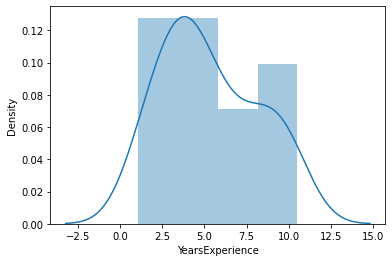

In [ ]:
sns.distplot(df['YearsExperience'])

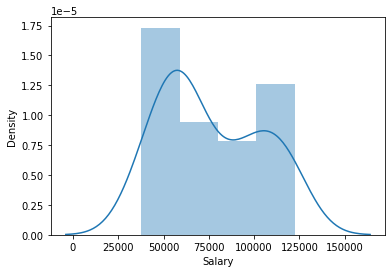

In [ ]:
sns.distplot(df['Salary'])

**Observation** > The dats is not normaly distrybuted

## Finding the outliers

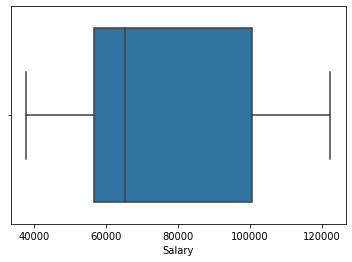

In [ ]:
sns.boxplot(df['Salary'])

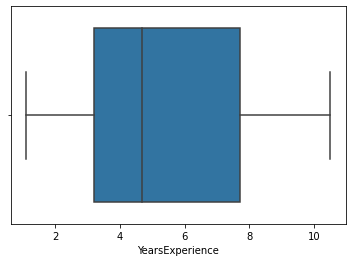

In [ ]:
sns.boxplot(df['YearsExperience'])

**Their is no outliers present in the data**

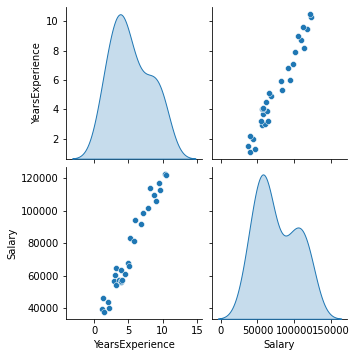

In [ ]:
sns.pairplot(df, diag_kind="kde")

# **Finding Correlation between to columns**

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


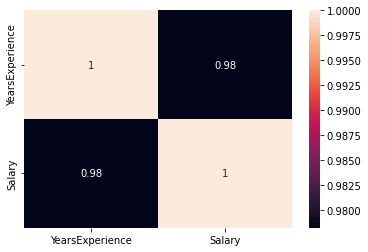

In [ ]:
sns.heatmap(df.corr(), annot=True)

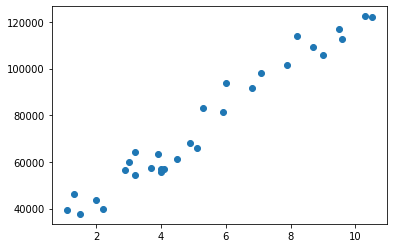

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])

# **Buliding the Model**

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data = df).fit()

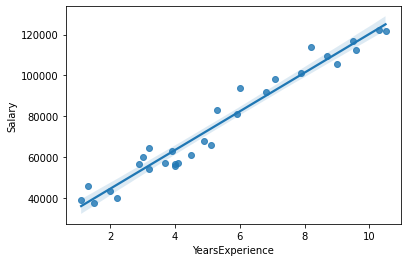

In [ ]:
sns.regplot(x='YearsExperience', y='Salary', data=df)

In [ ]:
#Coefficent
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# Predict for new data point

In [ ]:
new_data = pd.Series([1.1,1.7,2.3,3.5])

In [ ]:
df_pred = pd.DataFrame(new_data,columns=['YearsExperience'])

In [ ]:
model.predict(df_pred)

0    36187.158752
1    41857.136145
2    47527.113538
3    58867.068324
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        11:46:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

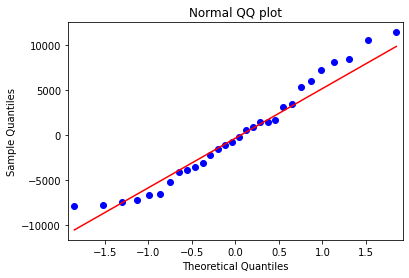

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')
plt.title('Normal QQ plot')
plt.show()

# Log Transformation
- Log Transformation of input variable

In [ ]:
X_log = np.log(df['YearsExperience'])
X_log

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

In [ ]:
model2 = smf.ols('Salary~X_log',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.25e-13
Time:                        11:58:05   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
X_log       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

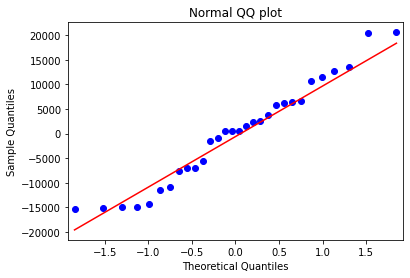

In [ ]:
qqplot=sm.qqplot(model2.resid, line='q')
plt.title('Normal QQ plot')
plt.show()

In [ ]:
#Log transformation on output variabel
Y_log = np.log(df['Salary'])

In [ ]:
Y_log

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: Salary, dtype: float64

In [ ]:
# moodel building
model3=smf.ols('Y_log~YearsExperience', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           7.03e-18
Time:                        12:05:29   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

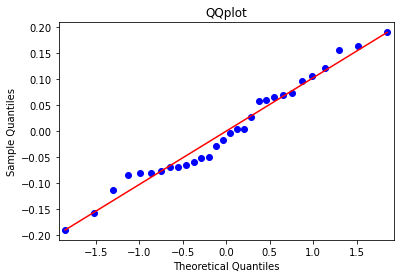

In [ ]:
qqplot=sm.qqplot(model3.resid, line='q')
plt.title("QQplot")
plt.show()

# Building final Model with Log Transformation

In [ ]:
model4 = smf.ols('Y_log~X_log', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Y_log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           7.40e-16
Time:                        12:08:15   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
X_log          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion
##- Our model is acceptabel as p-value is < significant value
##- Rsq value is 90.5%
##- AdjR-sq == 0.902, the model say that there are 90.2% variance in dependent variable